In [1]:
import osmuf as ouf

In [2]:
# dictionary of places of interest for convenience, 
places = {0:{'name':'buenos_aires', 'coordinates':(-34.5798,-58.4422),},
          1:{'name':'kaduna', 'coordinates':(10.53364, 7.37360),},
          2:{'name':'margery_street', 'coordinates':(51.5266,-0.1109),},
          3:{'name':'posadas', 'coordinates':(-27.37577,-55.90059),},
          4:{'name':'welwyn_garden_city', 'coordinates':(51.7938,-0.18645),},
          5:{'name':'hayes_lane', 'coordinates':(51.39425,-0.003),}
         }

# bounding box half-distance in meters
distance=500

In [3]:
place=places[5]

place_name=place['name']
point=place['coordinates']

# 00 - City blocks
***This module works with polygons in OpenStreetMap tagged as "place=city_block" - without those it will not work.***

OpenStreetMap is a crowdsourced map of the world. Anyone is free to edit the map and add 'city_block' polygons following the guidance on the OpenStreetMap wiki.

While various academic studies approximate urban blocks by polygonising transport network centerlines there are benefits - particularly at the more local scale - of working directly with the geometry of individual urban blocks. This includes revealing street widths, correctly representing cul-de-sacs/dead ends, being able to measure the ratio of land dedicated to the transport network against land for development/public amenity etc.

In some countries urban blocks are defined as part of the cadastre, in others no such legal definition exists yet their physical presence in the city is visibly defined by the line at which land dedicated to the public highway/transport network (e.g. streets (carriageway and pavement) and railway lines) meets land dedicated to private development or public amenity.

The intention of this python library is to reveal some of the metrics related to urban blocks in order to provide designers with information useful for optimising the design of new, sustainable bits of city.

In [4]:
# retreive the data
study_area = ouf.study_area_from_point(point, distance)
city_blocks = ouf.city_blocks_from_point(point, distance)
buildings = ouf.buildings_from_gdf(city_blocks)
street_graph = ouf.street_graph_from_gdf(city_blocks)
streets = ouf.streets_from_street_graph(street_graph)

In [5]:
# process the city blocks
city_blocks, city_blocks_gross = ouf.gen_city_blocks_gross(street_graph, city_blocks)
city_blocks_form_factor = ouf.form_factor(city_blocks)

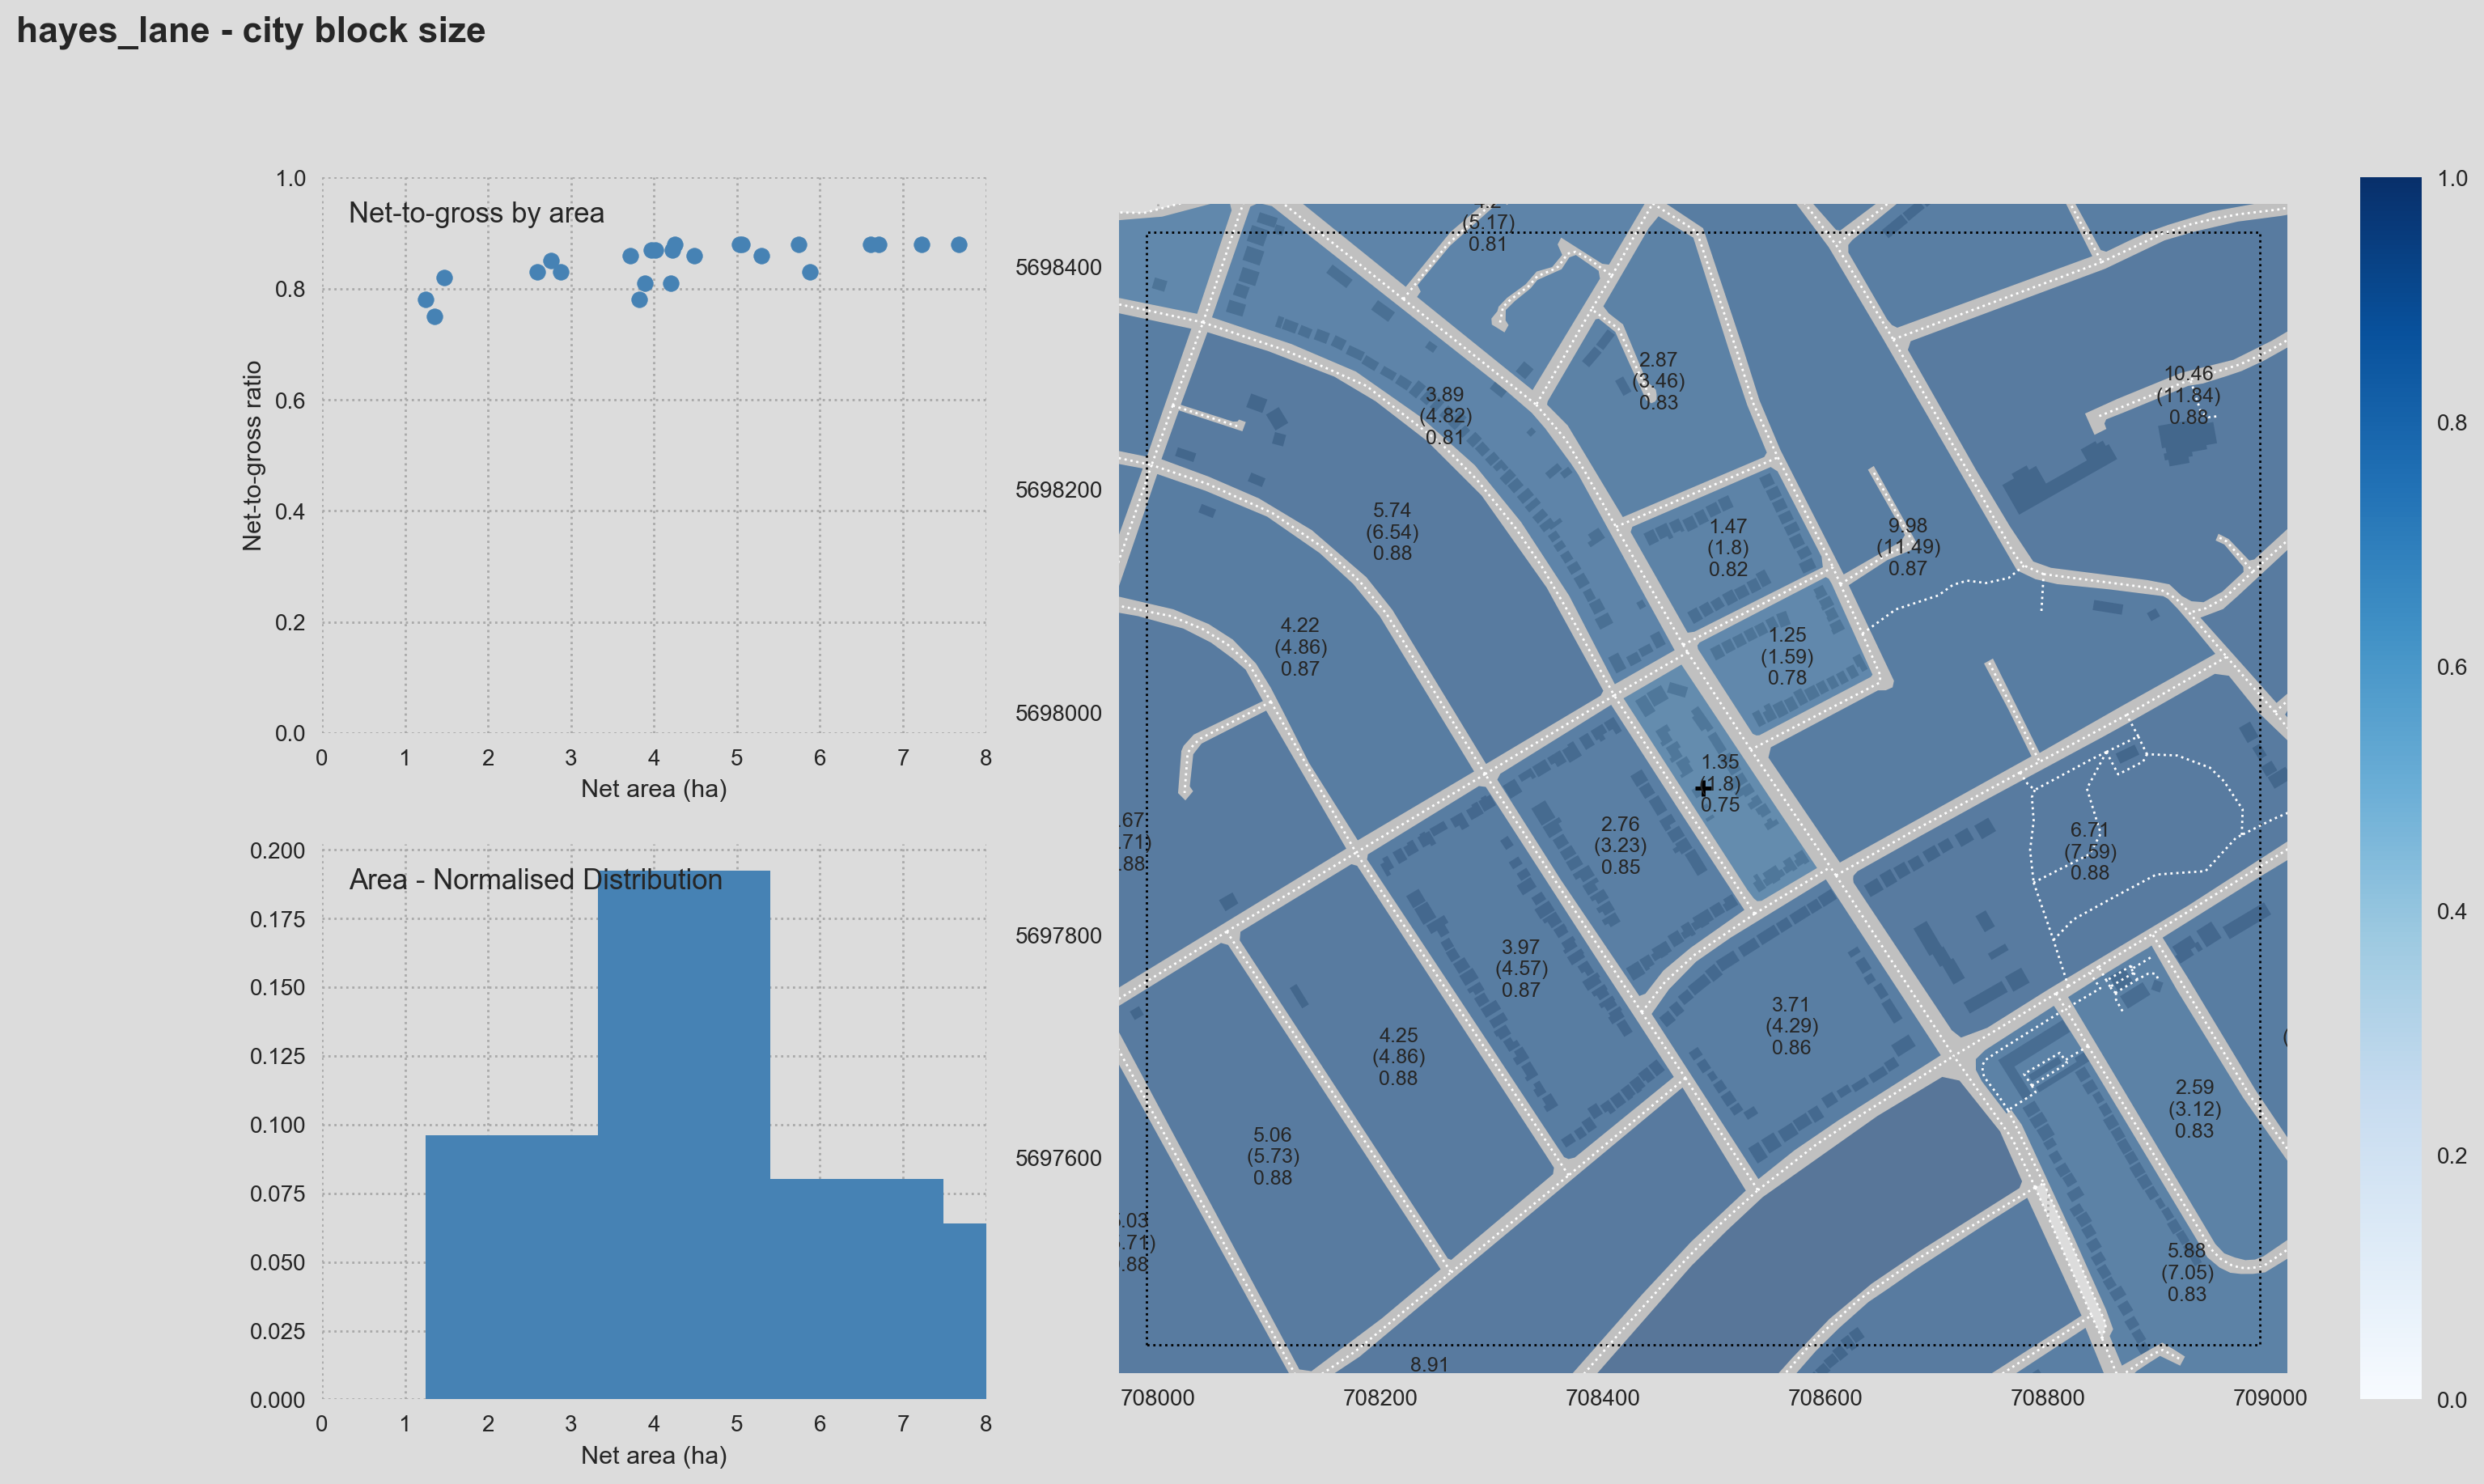

In [6]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - city block size', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_block_ntg_to_size(ax[0], city_blocks)
ouf.ax_block_area_distribution(ax[1], city_blocks)
ouf.ax_map_block_size(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/00_blocks_size_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

In [7]:
city_blocks.describe()

,perimeter_m,area_net_ha,perimeter_per_area,area_gross_ha,net_to_gross
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1299.804749,6.211803,246.646248,7.121439,0.853000
std,722.334970,6.231936,67.433353,6.726479,0.037797
min,444.404791,1.248024,113.964446,1.591000,0.750000
25%,885.345315,3.837043,203.504973,4.575920,0.830000
50%,1116.061231,4.757424,223.236830,5.469489,0.865000
75%,1515.507874,7.096677,291.699390,8.048926,0.880000
max,4169.595808,36.586812,414.693326,39.697593,0.920000
